In [66]:
# -*- coding: utf-8 -*-
"""
Created by Chris Stewart & David Wang

---
This code was written as part of the Space Apps Challenge 2020
on Oct 2-4, 2020.

It utilizes prepared MOPITT MOP02J version 8 CSV files in Python 
and generates visualizations of the COTotalColumn data using cartopy.

The CSV data files must be in a directory "/data" at the same level as another directory "/code" where the .ipynb code file must be (your current working directory).

More info can be found in the readme file.
"""
import os
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import ipywidgets as widget


from matplotlib import animation, rc
from IPython.display import HTML

In [67]:
full_path = Path(os.getcwd()).parents[0] / 'data' # get path to data files (/data is the same level as /code directory)
file_dict = {} # to store file:path pairs

print('Loading data files...')
for r, _, file in os.walk(full_path): # get all the csvs
    for f in file:
        if f.endswith(".csv"):
            #print(os.path.join(r, f))
            file_dict[f] = os.path.normpath(os.path.join(r, f))

data_df = pd.concat((pd.read_csv(r, usecols=['# Latitude',' Longitude',' COTotalColumn','COMixingRatio surface']).assign(Filename = f) for f, r in file_dict.items())) # read CSVs into a dataframe
print('Loading Complete!')

print('Processing...') # create year, month, and day columns
data_df['Date'] = data_df['Filename'].apply(lambda x: x.split('-',maxsplit=2)[1])
data_df['Year'] = data_df['Date'].apply(lambda x: int(x[0:4]))
data_df['Month'] = data_df['Date'].apply(lambda x: int(x[4:6]))
data_df['Day'] = data_df['Date'].apply(lambda x: int(x[6:8]))
data_df.rename(columns = {'# Latitude':'Latitude',' Longitude':'Longitude',' COTotalColumn':'COTotalColumn','COMixingRatio surface':'COMixingRatio_surface'}, inplace = True) # get rid of column header whitespaces
data_df.reset_index(inplace=True)
# set up data for graphing

lat = data_df['Latitude']
long = data_df['Longitude']
COTotalColumn = data_df['COTotalColumn']
COMixingRatio_surface = data_df['COMixingRatio_surface']

print('Processing done!')

Loading data files...
Loading Complete!
Processing...
Processing done!


In [68]:
data_df # TEMPORARY to see if data loaded correctly

,index,Latitude,Longitude,COTotalColumn,COMixingRatio_surface,Filename,Date,Year,Month,Day
0,0,-77.7472,43.1307,8.265200e+17,132.1690,MOP02J-20200301-L2V18.0.3.csv,20200301,2020,3,1
1,1,-77.8375,44.1249,8.201560e+17,126.9870,MOP02J-20200301-L2V18.0.3.csv,20200301,2020,3,1
2,2,-77.9242,45.1334,6.825480e+17,90.0939,MOP02J-20200301-L2V18.0.3.csv,20200301,2020,3,1
3,3,-78.0073,46.1582,6.219220e+17,77.3387,MOP02J-20200301-L2V18.0.3.csv,20200301,2020,3,1
4,4,-78.1851,42.0651,7.598280e+17,114.3460,MOP02J-20200301-L2V18.0.3.csv,20200301,2020,3,1
...,...,...,...,...,...,...,...,...,...,...
5229936,246611,42.0986,-28.4305,2.072760e+18,116.8890,MOP02J-20200322-L2V18.0.3.csv,20200322,2020,3,22
5229937,246612,42.0544,-28.9660,2.038830e+18,114.4640,MOP02J-20200322-L2V18.0.3.csv,20200322,2020,3,22
5229938,246613,43.1304,-26.6990,2.004040e+18,114.4150,MOP02J-20200322-L2V18.0.3.csv,20200322,2020,3,22
5229939,246614,43.2075,-27.0174,2.030990e+18,118.6120,MOP02J-20200322-L2V18.0.3.csv,20200322,2020,3,22


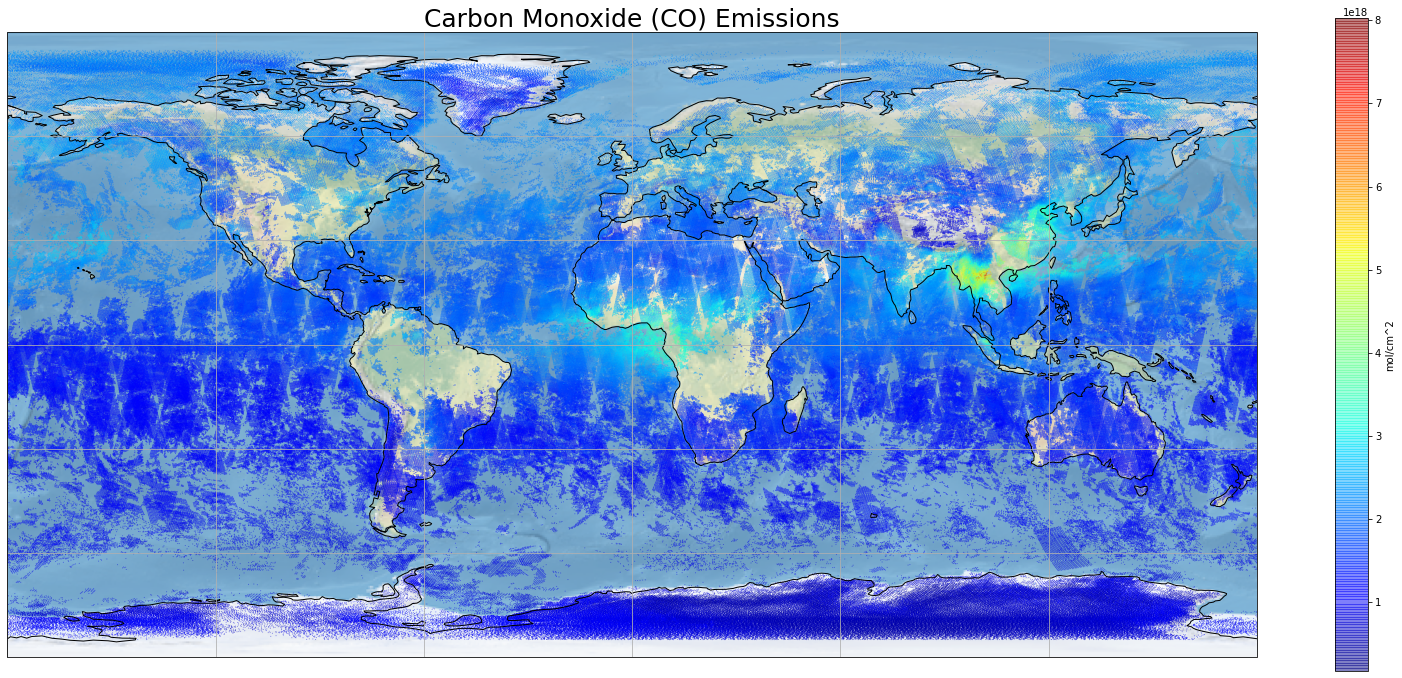

In [72]:
#%matplotlib notebook - disable interactivity for now

fig = plt.figure(figsize=(28,12))

ax = fig.add_subplot(1,1,1, projection=crs.PlateCarree()) #.Robinson()) - alternate projection
# add details and features to map
ax.stock_img()
ax.coastlines()
ax.gridlines()

i = data_df[(data_df['Year']==2020) & (data_df['Month']==3) & (data_df['Day']>=11) & (data_df['Day']<=15)].index

plt.scatter(x=long.iloc[i], y=lat.iloc[i], #long, y=lat,   #
            c=COTotalColumn.iloc[i], #COTotalColumn,   # #COMixingRatio_surface,
            s=1,
            alpha=0.5,
            cmap=plt.cm.jet,
            edgecolors=None, 
            linewidth=0,
            transform=crs.PlateCarree()) ## Important

#fig.colorbar(cm.ScalarMappable(norm=norm, cmap=plt.cm.jet))#, ax=ax)

cb = plt.colorbar()
cb.set_label('mol/cm^2')

plt.title('Carbon Monoxide (CO) Emissions', size=25)

plt.show()

In [73]:
#fig = plt.gcf()
image_name = ('{0}_{1}'.format('CO Emissions','20200306')) #data_df['Date'][0]))
pngfile = "{0}.png".format(image_name)
fig.savefig(pngfile)

### TESTING FILTERING DATES

In [5]:
i = data_df[(data_df['Year']==2020) & (data_df['Month']==3) & (data_df['Day']>=1) & (data_df['Day']<=16)].index
len(i)

476055

In [6]:
lat.iloc[i]

0        -49.32790
1        -49.46980
2        -49.26200
3        -49.05420
4        -48.84590
            ...   
230875    -2.95792
230876    -3.64101
230877    -3.44202
230878    -3.24313
230879    -3.04390
Name: Latitude, Length: 476055, dtype: float64

In [53]:
data_df[(data_df['Latitude']>=lower_lat) & (data_df['Latitude']<=10) & (data_df['Longitude']>=0) & (data_df['Longitude']<=10)]

,index,Latitude,Longitude,COTotalColumn,COMixingRatio_surface,Filename,Date,Year,Month,Day
222126,222126,0.038978,6.13868,2.963630e+18,119.152,MOP02J-20200315-L2V18.0.3.csv,20200315,2020,3,15
222128,222128,0.581607,6.21094,2.989210e+18,123.627,MOP02J-20200315-L2V18.0.3.csv,20200315,2020,3,15
222129,222129,0.381237,6.23979,3.010280e+18,127.411,MOP02J-20200315-L2V18.0.3.csv,20200315,2020,3,15
222130,222130,0.180869,6.26823,3.040890e+18,127.726,MOP02J-20200315-L2V18.0.3.csv,20200315,2020,3,15
222132,222132,0.552926,5.80364,3.006620e+18,126.706,MOP02J-20200315-L2V18.0.3.csv,20200315,2020,3,15
...,...,...,...,...,...,...,...,...,...,...
1919597,227135,8.081680,3.85229,3.282550e+18,243.270,MOP02J-20200322-L2V18.0.3.csv,20200322,2020,3,22
1919598,227136,8.050980,3.45319,3.033160e+18,216.636,MOP02J-20200322-L2V18.0.3.csv,20200322,2020,3,22
1919599,227137,8.512990,3.92366,2.910590e+18,227.864,MOP02J-20200322-L2V18.0.3.csv,20200322,2020,3,22
1919602,227140,9.795050,5.58564,3.190100e+18,280.935,MOP02J-20200322-L2V18.0.3.csv,20200322,2020,3,22


In [ ]:
sci